In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
# import datetime as dt
from datetime import timedelta, datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
most_recent_date

'2017-08-23'

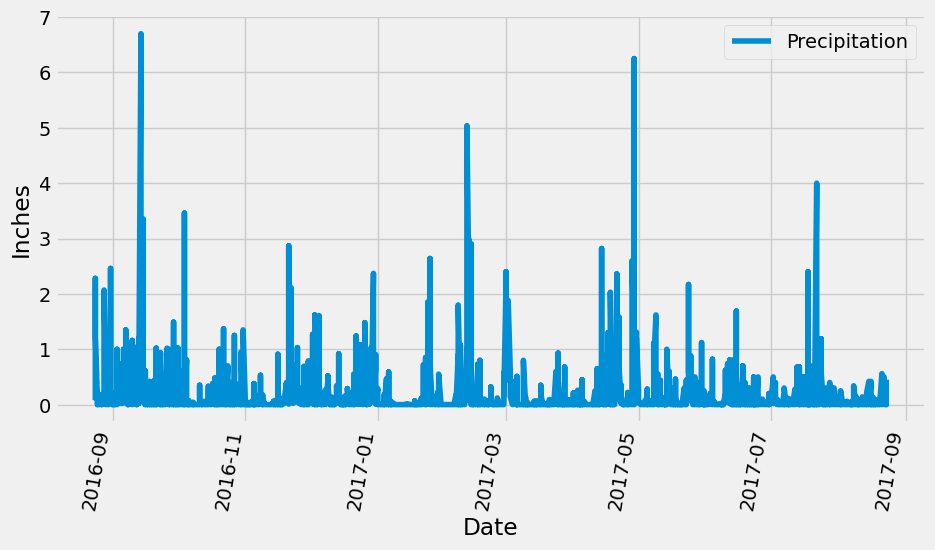

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Convert scalar latest date to datetime object
most_recent_date_dt = datetime.strptime(most_recent_date, '%Y-%m-%d')
# Calculate the date one year from the last date in data set.
one_year_prior = most_recent_date_dt - timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
precip_scores = session.query(measurement.date, measurement.prcp).\
filter(measurement.date.between(one_year_prior, most_recent_date_dt)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_scores_df = pd.DataFrame(precip_scores, columns=['Date', 'Precipitation'])

# Sort the dataframe by date

#convert date column to datetime format
precip_scores_df['Date'] = pd.to_datetime(precip_scores_df['Date'])
precip_scores_df_sorted = precip_scores_df.sort_values('Date')

#Remove NaN values from dataset
precip_cleaned_df = precip_scores_df_sorted.dropna()
#Set index as date column for easy plotting
precip_scores_df_final = precip_cleaned_df.set_index("Date")

# Use Pandas Plotting with Matplotlib to plot the data
precip_scores_df_final.plot(figsize=(10, 6))
plt.ylabel('Inches')
plt.xticks(rotation=80)

plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precip_scores_df_final.describe()
summary_stats

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
no_of_stations = session.query(func.count(station.station)).all()
no_of_stations

[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature


#query only the station that was identified as most active in the measurement table
most_active_station = session.query(measurement.station, measurement.date, measurement.tobs).\
filter(measurement.station == "USC00519281").all()

#convert list of tuples to pandas dataframe
most_active_station_df = pd.DataFrame(most_active_station, columns=['station', 'date', 'temp'])

#lowest temperature
min_temp = most_active_station_df['temp'].min()

#highest temperature
max_temp = most_active_station_df['temp'].max()

#Average temperature
avg_temp = most_active_station_df['temp'].mean()

print('Lowest Temperature: ', min_temp)
print('Highest Temperature: ', max_temp)
print('Average Temperature: ', avg_temp)


Lowest Temperature:  54.0
Highest Temperature:  85.0
Average Temperature:  71.66378066378067


In [16]:
most_active_station

[('USC00519281', '2010-01-01', 70.0),
 ('USC00519281', '2010-01-02', 62.0),
 ('USC00519281', '2010-01-03', 74.0),
 ('USC00519281', '2010-01-04', 75.0),
 ('USC00519281', '2010-01-05', 74.0),
 ('USC00519281', '2010-01-06', 76.0),
 ('USC00519281', '2010-01-07', 69.0),
 ('USC00519281', '2010-01-08', 66.0),
 ('USC00519281', '2010-01-09', 70.0),
 ('USC00519281', '2010-01-10', 75.0),
 ('USC00519281', '2010-01-11', 64.0),
 ('USC00519281', '2010-01-12', 60.0),
 ('USC00519281', '2010-01-13', 61.0),
 ('USC00519281', '2010-01-14', 68.0),
 ('USC00519281', '2010-01-15', 64.0),
 ('USC00519281', '2010-01-16', 66.0),
 ('USC00519281', '2010-01-17', 67.0),
 ('USC00519281', '2010-01-18', 70.0),
 ('USC00519281', '2010-01-19', 67.0),
 ('USC00519281', '2010-01-20', 67.0),
 ('USC00519281', '2010-01-21', 69.0),
 ('USC00519281', '2010-01-22', 60.0),
 ('USC00519281', '2010-01-23', 75.0),
 ('USC00519281', '2010-01-24', 75.0),
 ('USC00519281', '2010-01-25', 65.0),
 ('USC00519281', '2010-01-26', 75.0),
 ('USC005192

Text(0.5, 0, 'Temperature')

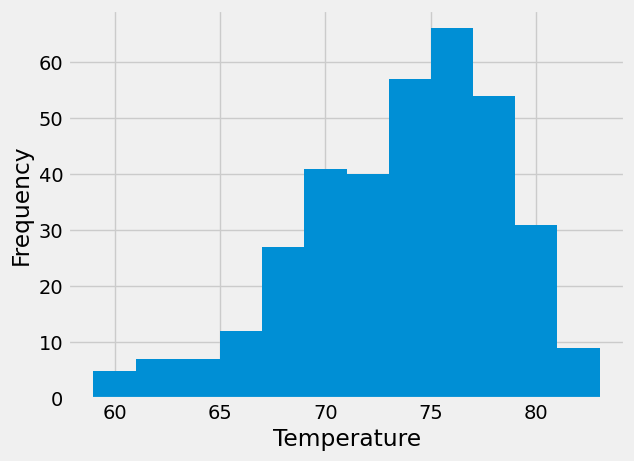

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#query the most recent date for data collected at the most active "USC00519281" station
most_recent_date_active = session.query(func.max(measurement.date)).\
filter(measurement.station == 'USC00519281').scalar()

# Convert scalar latest date to datetime object
most_recent_date_active_dt = datetime.strptime(most_recent_date_active, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_prior_active = most_recent_date_active_dt - timedelta(days=365)

# Perform a query to retrieve the date and temperature for the USC00519281 station
one_year_temps_query = session.query(measurement.date, measurement.tobs).\
filter(measurement.station == 'USC00519281').\
filter(measurement.date.between(one_year_prior_active, most_recent_date_active_dt)).all()

# convert query to a pandas dataframe for histogram plotting
one_year_temps_df = pd.DataFrame(one_year_temps_query, columns=['date', 'temp'])

#plot the histogram for the temps
plot = one_year_temps_df['temp'].plot.hist(bins=12)
plot.set_xlabel('Temperature')


In [29]:
test_date = '2010-01-03'
test_query = session.query(measurement.date, measurement.tobs).\
filter(measurement.date == test_date).all()
temperatures = [result.tobs for result in test_query]
temperatures

[74.0, 75.0, 67.0, 77.0, 74.0, 75.0, 76.0]

# Close Session

In [95]:
# Close Session
session.close()